In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn import linear_model

In [4]:
data = pd.read_csv('googleplaystore.csv')
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
data = data.drop(['Android Ver','Last Updated','Current Ver'], axis=1)
data.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


In [4]:
#data = data.drop(data['Price']=='Everyone', axis=0)
data.size

108410

In [6]:
#Drop the duplicate rows having same app names
data.drop_duplicates(subset='App', keep='first', inplace=True)

In [6]:
data.size

96600

In [7]:
#remove data with 0 reviews, 0 installs or null ratings
data.dropna(subset=['Reviews', 'Rating', 'Installs','Content Rating'], inplace=True)

In [8]:
data.size

81960

In [8]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [9]:
print( len(data['Genres'].unique()) , "allGenres")

print("\n", data['Genres'].unique())

114 allGenres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educ

In [10]:
# for i in data['Genres']:
#     arr = i.split(';')
# Trim the Genre and remove the subcategory mentioned after ';''
data['Genres'] = [i.split(';')[0] for i in data['Genres']]
data['Genres']

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10834            Education
10836            Education
10837            Education
10839    Books & Reference
10840            Lifestyle
Name: Genres, Length: 8196, dtype: object

In [11]:
# Remove the + from Installs and make it purely a number
data['Installs'] = [i[:-1].replace(',','') for i in data['Installs']]
data = data[data['Installs'] != '']
data['Installs'] = [int(i) for i in data['Installs']]

In [12]:
for i,row in data.iterrows():
    if 'M' in row['Size']:
        x = row['Size'][:-1]
        y = float(x)*1000
    elif 'k' in row['Size']:
        x = row['Size'][:-1]
        y = float(x)
    else:
        y = 0
    data.at[i, 'Size'] = y
data['Size'] = data['Size'].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   float64
 5   Installs        8196 non-null   int64  
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [13]:
data.dropna(subset=['Size'], inplace=True)

In [16]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0,Mature 17+,Books & Reference


In [14]:
# Converting Category categorical values into numerical values
categoryValues = data["Category"].unique()
category_dict = {}
for i in range(len(categoryValues)):
    category_dict[categoryValues[i]] = i
data["Category_n"] = data["Category"].map(category_dict).astype(int)
data["Category_n"]

0         0
1         0
2         0
3         0
4         0
         ..
10834    18
10836    18
10837    18
10839     3
10840    16
Name: Category_n, Length: 8196, dtype: int32

In [15]:
data.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_n
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8191,10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0,Everyone,Education,18
8192,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0,Everyone,Education,18
8193,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0,Everyone,Education,18
8194,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0,Mature 17+,Books & Reference,3


In [16]:
# Converting Content Rating categorical values into numerical values
categoryValues = data["Content Rating"].unique()
category_dict = {}
for i in range(len(categoryValues)):
    category_dict[categoryValues[i]] = i
data["Content Rating_n"] = data["Content Rating"].map(category_dict).astype(int)
data["Content Rating_n"]

0        0
1        0
2        0
3        1
4        0
        ..
10834    0
10836    0
10837    0
10839    3
10840    0
Name: Content Rating_n, Length: 8196, dtype: int32

In [20]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_n,Content Rating_n
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design,0,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,0,0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0,Everyone,Art & Design,0,0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0,Everyone,Art & Design,0,0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0,Everyone,Art & Design,0,0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0,Everyone,Art & Design,0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   object 
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   object 
 7   Price             8196 non-null   object 
 8   Content Rating    8196 non-null   object 
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int32  
 11  Content Rating_n  8196 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 768.4+ KB


In [17]:
for i,row in data.iterrows():
    if row['Price'] == '0':
        data.at[i,'Price'] = 0
    else:
        data.at[i,'Price'] = row['Price'][1:]
data['Price'] = data['Price'].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   object 
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   object 
 7   Price             8196 non-null   float64
 8   Content Rating    8196 non-null   object 
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int32  
 11  Content Rating_n  8196 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 1.1+ MB


In [18]:
data['Reviews'] = data['Reviews'].astype(int)

In [19]:
for i,row in data.iterrows():
    if row['Type'] == 'Free':
        data.at[i,'Type'] = 0
    else:
        data.at[i,'Type'] = 1
data['Type'] = data['Type'].astype(int)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   int32  
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   int32  
 7   Price             8196 non-null   float64
 8   Content Rating    8196 non-null   object 
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int32  
 11  Content Rating_n  8196 non-null   int32  
dtypes: float64(3), int32(4), int64(1), object(4)
memory usage: 1.0+ MB


In [27]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_n,Content Rating_n
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Everyone,Art & Design,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Everyone,Art & Design,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Everyone,Art & Design,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Teen,Art & Design,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Everyone,Art & Design,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,0,0.0,Everyone,Education,18,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,0,0.0,Everyone,Education,18,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,0,0.0,Everyone,Education,18,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,0,0.0,Mature 17+,Books & Reference,3,3


In [20]:
data = data.drop(['Content Rating'], axis=1)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Art & Design,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Art & Design,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Art & Design,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Art & Design,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Art & Design,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,0,0.0,Education,18,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,0,0.0,Education,18,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,0,0.0,Education,18,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,0,0.0,Books & Reference,3,3


In [21]:
new_data = pd.get_dummies(data, columns=['Category'], drop_first="True")

In [30]:
new_data.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000.0,10000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14000.0,500000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700.0,5000000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000.0,50000000,0,0.0,Art & Design,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800.0,100000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Running linear regression on dummy variables
X = new_data.drop(labels = ['App','Category_n','Rating','Genres'],axis = 1)
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [74]:
model = linear_model.LinearRegression().fit(X = x_train_scaled, y = y_train)

score_train = model.score(X = x_train_scaled, y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled, y = y_test) # R squared (validation)
Results = model.predict(x_test_scaled)
print([score_train, score_val])

[0.029871238761354335, 0.023382123245895947]


In [75]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

Mean Squared Error: 0.2774006771245611
Mean absolute Error: 0.39658936846933196
Mean squared Log Error: 0.013455805203233038


In [76]:
X.head(5)

,Reviews,Size,Installs,Type,Price,Content Rating_n,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000.0,10000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000.0,500000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700.0,5000000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000.0,50000000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800.0,100000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,1,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,1,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,1,2]], y = y_test) # R squared (validation)
Results = model.predict(x_test_scaled[:,[0,1,2]])
print([score_train, score_val])

[0.004272071732113747, 0.005318891843961393]


In [ ]:
# Pie chart for the number of installs against category : for the most installs.

df = pd.DataFrame({'installs': data['Installs'],
                   'category': data['Category'].unique()},
                  index= data['Category'].unique())
plot = df.plot.pie(normalize = False,y='installs', figsize=(5, 5))

In [ ]:
#Plotting installs against how many such apps:

plt.figure(figsize = (12,10))
plt.bar(data['Installs'].value_counts().index.tolist(),data['Installs'].value_counts(), color = "blue")
plt.xticks(rotation=90)
for i in range(len(data['Installs'].value_counts())):
    txt = f"{data['Installs'].value_counts()[i]}"
plt.xlabel("Installs",size = 15, color = "black")
plt.ylabel("count",size = 15, color = "black")
plt.title("Installs",size = 20, color = "black")
plt.show()

In [ ]:
data.head()

In [50]:
for i,row in data.iterrows():
    data.at[i,'Rating'] = round(row['Rating']*2)/2

In [51]:
new_data = pd.get_dummies(data, columns=['Category'], drop_first="True")

In [52]:
# Running linear regression on dummy variables
X = new_data.drop(labels = ['App','Category_n','Rating','Size','Genres','Installs'],axis = 1)
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [54]:
model = linear_model.LinearRegression()
model.fit(x_train_scaled,y_train)
model.score(X = x_train_scaled, y = y_train)

0.0317237612823239

In [55]:
Results = model.predict(x_test_scaled)
Results

array([4.12517949, 4.23675196, 4.29117957, ..., 4.18106041, 4.06804483,
       4.0304471 ])

In [56]:
corr_coef = np.corrcoef(Results, y_test)[1,0]
R_squared = (corr_coef)**2
print(R_squared)

0.017080628317614872


In [57]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

Mean Squared Error: 0.2961812745334466
Mean absolute Error: 0.4027302349071661
Mean squared Log Error: 0.014407327154276672


Text(0.5, 1.0, 'Distribution of Rating')

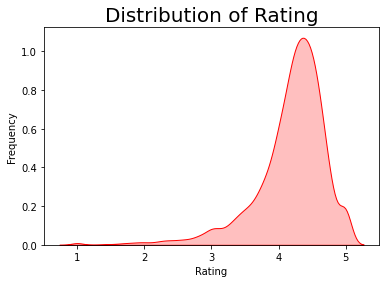

In [22]:
# EDA : Plots for exploration

#Distribution of rating : 

g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

***The rating seems to be concentrated around 4.3***

Text(0.5, 1.0, 'Count of app in each category')

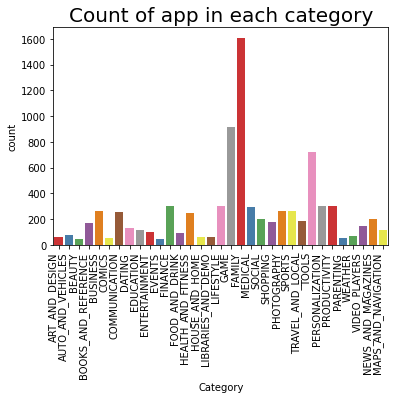

In [26]:
#Count of apps in each category

g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

Text(0.5, 1.0, 'Rating VS Reveiws')

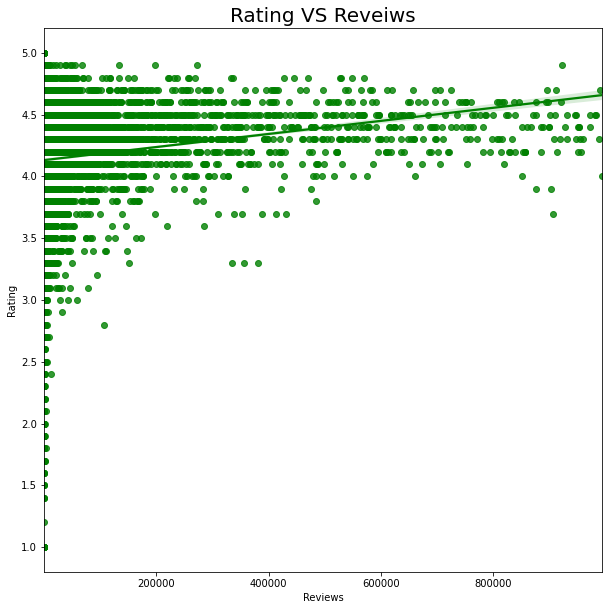

In [27]:
#Rating vs Reviews

plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'green',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

In [107]:
reviews_data = pd.read_csv('googleplaystore_user_reviews.csv')
reviews_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import warnings
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

In [109]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   int64  
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   int64  
 7   Price             8196 non-null   float64
 8   Genres            8196 non-null   object 
 9   Category_n        8196 non-null   int64  
 10  Content Rating_n  8196 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [111]:
merged_data = pd.merge(data, reviews_data, how='right')
merged_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64290,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN


## Now we will perform sentiment analysis on the merged data

In [112]:
merged_data = merged_data.dropna()
merged_data.drop(['App','Sentiment_Polarity','Sentiment_Subjectivity','Genres'],axis=1,inplace=True)
merged_data

,Category,Rating,Reviews,Size,Installs,Type,Price,Category_n,Content Rating_n,Translated_Review,Sentiment
0,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,I like eat delicious food. That's I'm cooking ...,Positive
1,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,This help eating healthy exercise regular basis,Positive
3,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,Works great especially going grocery store,Positive
4,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,Best idea us,Positive
5,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,Best way,Positive
...,...,...,...,...,...,...,...,...,...,...,...
64222,LIFESTYLE,4.1,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,Most ads older many agents ..not much owner po...,Positive
64223,LIFESTYLE,4.1,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,"If photos posted portal load, fit purpose. I'm...",Positive
64226,LIFESTYLE,4.1,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,"Dumb app, I wanted post property rent give opt...",Negative
64227,LIFESTYLE,4.1,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,I property business got link SMS happy perform...,Positive


In [114]:
sentiment_data = merged_data[['Translated_Review','Sentiment']]
sentiment_data

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


### Converting the case of reviews to lower

In [116]:

sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].str.lower()
sentiment_data

,Translated_Review,Sentiment
0,i like eat delicious food. that's i'm cooking ...,Positive
1,this help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
...,...,...
64222,most ads older many agents ..not much owner po...,Positive
64223,"if photos posted portal load, fit purpose. i'm...",Positive
64226,"dumb app, i wanted post property rent give opt...",Negative
64227,i property business got link sms happy perform...,Positive


### Removing punctuation and special characters


In [117]:
import re
sentiment_data['Translated_Review'] = [re.sub(r'[^A-Za-z0-9 ]+', '', i) for i in sentiment_data['Translated_Review']]
sentiment_data.head(10)

,Translated_Review,Sentiment
0,i like eat delicious food thats im cooking foo...,Positive
1,this help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
6,amazing,Positive
8,looking forward app,Neutral
9,it helpful site it help foods get,Neutral
10,good you,Positive
11,useful information the amount spelling errors ...,Positive


### Remove stop words from the reviews data

In [120]:
import nltk
nltk.download('stopwords')
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x not in stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sharatnaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
sentiment_data

,Translated_Review,Sentiment
0,like eat delicious food thats im cooking food ...,Positive
1,help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
...,...,...
64222,ads older many agents much owner posted detail...,Positive
64223,photos posted portal load fit purpose im sure ...,Positive
64226,dumb app wanted post property rent give option...,Negative
64227,property business got link sms happy performan...,Positive


### Remove numbers from the data

In [123]:
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x.isdigit()==False))
sentiment_data

,Translated_Review,Sentiment
0,like eat delicious food thats im cooking food ...,Positive
1,help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
...,...,...
64222,ads older many agents much owner posted detail...,Positive
64223,photos posted portal load fit purpose im sure ...,Positive
64226,dumb app wanted post property rent give option...,Negative
64227,property business got link sms happy performan...,Positive


### Stemming every word in review text

In [124]:
st = PorterStemmer()
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x: " ".join(st.stem(word) for word in x.split()))
sentiment_data.head()

,Translated_Review,Sentiment
0,like eat delici food that im cook food case be...,Positive
1,help eat healthi exercis regular basi,Positive
3,work great especi go groceri store,Positive
4,best idea us,Positive
5,best way,Positive
